# CVE Calendar Heat Map (No Data Clean Up)

This notebook will pull all [JSON Data](https://nvd.nist.gov/vuln/data-feeds#JSON_FEED) from the NVD and create a HeatMap using [CalPlot](https://pypi.org/project/calplot/)

### Retrieve The Data

This cell pulls all JSON files from the NVD that we will be working with.

In [6]:
%%capture
!mkdir -p jsondata
%cd jsondata
!rm *.json 
!rm *.zip 
!wget https://nvd.nist.gov/feeds/json/cve/1.1/nvdcve-1.1-{2002..2020}.json.zip 
!unzip -o "*.zip" 

(Note: The Output of this cell is hidden with `%%capture`)

### Import Python Libraries 

In [7]:
import calplot
import glob
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import uuid
from datetime import datetime

### Build Base DataFrame

This code builds a Panda dataframe from the JSON files we downloaded, removing all CVE's marked rejected.

In [8]:
row_accumulator = []
for filename in glob.glob('*.json'):
    with open(filename, 'r', encoding='utf-8') as f:
        nvd_data = json.load(f)
        for entry in nvd_data['CVE_Items']:
            cve = entry['cve']['CVE_data_meta']['ID']
            try:
                published_date = entry['publishedDate']
            except KeyError:
                published_date = 'Missing_Data_JG'
            try:
                attack_vector = entry['impact']['baseMetricV3']['cvssV3']['attackVector']
            except KeyError:
                attack_vector = 'Missing_Data_JG'
            try:
                attack_complexity = entry['impact']['baseMetricV3']['cvssV3']['attackComplexity']
            except KeyError:
                attack_complexity = 'Missing_Data_JG'
            try:
                privileges_required = entry['impact']['baseMetricV3']['cvssV3']['privilegesRequired']
            except KeyError:
                privileges_required = 'Missing_Data_JG'
            try:
                user_interaction = entry['impact']['baseMetricV3']['cvssV3']['userInteraction']
            except KeyError:
                user_interaction = 'Missing_Data_JG'
            try:
                scope = entry['impact']['baseMetricV3']['cvssV3']['scope']
            except KeyError:
                scope = 'Missing_Data_JG'
            try:
                confidentiality_impact = entry['impact']['baseMetricV3']['cvssV3']['confidentialityImpact']
            except KeyError:
                confidentiality_impact = 'Missing_Data_JG'
            try:
                integrity_impact = entry['impact']['baseMetricV3']['cvssV3']['integrityImpact']
            except KeyError:
                integrity_impact = 'Missing_Data_JG'
            try:
                availability_impact = entry['impact']['baseMetricV3']['cvssV3']['availabilityImpact']
            except KeyError:
                availability_impact = 'Missing_Data_JG'
            try:
                base_score = entry['impact']['baseMetricV3']['cvssV3']['baseScore']
            except KeyError:
                base_score = 'Missing_Data_JG'
            try:
                base_severity = entry['impact']['baseMetricV3']['cvssV3']['baseSeverity']
            except KeyError:
                base_severity = 'Missing_Data_JG'
            try:
                exploitability_score = entry['impact']['baseMetricV3']['exploitabilityScore']
            except KeyError:
                exploitability_score = 'Missing_Data_JG'
            try:
                impact_score = entry['impact']['baseMetricV3']['impactScore']
            except KeyError:
                impact_score = 'Missing_Data_JG'
            try:
                cwe = entry['cve']['problemtype']['problemtype_data'][0]['description'][0]['value']
            except IndexError:
                cwe = 'Missing_Data_JG'
            try:
                description = entry['cve']['description']['description_data'][0]['value']
            except IndexError:
                description = ''
            new_row = { 
                'CVE': cve, 
                'Published': published_date,
                'AttackVector': attack_vector,
                'AttackComplexity': attack_complexity,
                'PrivilegesRequired': privileges_required,
                'UserInteraction': user_interaction,
                'Scope': scope,
                'ConfidentialityImpact': confidentiality_impact,
                'IntegrityImpact': integrity_impact,
                'AvailabilityImpact': availability_impact,
                'BaseScore': base_score,
                'BaseSeverity': base_severity,
                'ExploitabilityScore': exploitability_score,
                'ImpactScore': impact_score,
                'CWE': cwe,
                'Description': description
            }
            if not description.startswith('** REJECT **'): # disputed, rejected and other non issues start with '**'
                row_accumulator.append(new_row)
    nvd = pd.DataFrame(row_accumulator)

nvd['Published'] = pd.to_datetime(nvd['Published']).apply(lambda x: x.date())
print ('CVEs from NVD:', nvd['CVE'].count())
nvdcount = nvd['Published'].count()
nvdunique = nvd['Published'].nunique()
per_day = nvdcount/nvdunique
per_day = round(per_day, 0)
print('CVEs Published Per Publishing Day:', per_day)

CVEs from NVD: 146599
CVEs Published Per Publishing Day: 24.0


(Note: The code for building this dataframe is based off the great work in this [repo](https://github.com/joocer/mitre-tools/blob/74a08bca9e79f2c18cc4e8671d1d7da5b43a2dd4/source/data/02%20process_rawdata.py))

In [9]:
print ('CVEs from NVD:', nvd['CVE'].count())
nvdcount = nvd['Published'].count()
nvdunique = nvd['Published'].nunique()
per_day = nvdcount/nvdunique
per_day = round(per_day, 0)
print('CVEs Published Per Publishing Day:', per_day)

CVEs from NVD: 146599
CVEs Published Per Publishing Day: 24.0


### CVEs Per Day Graph (All Data Points)

Text(0.5, 0, 'Date')

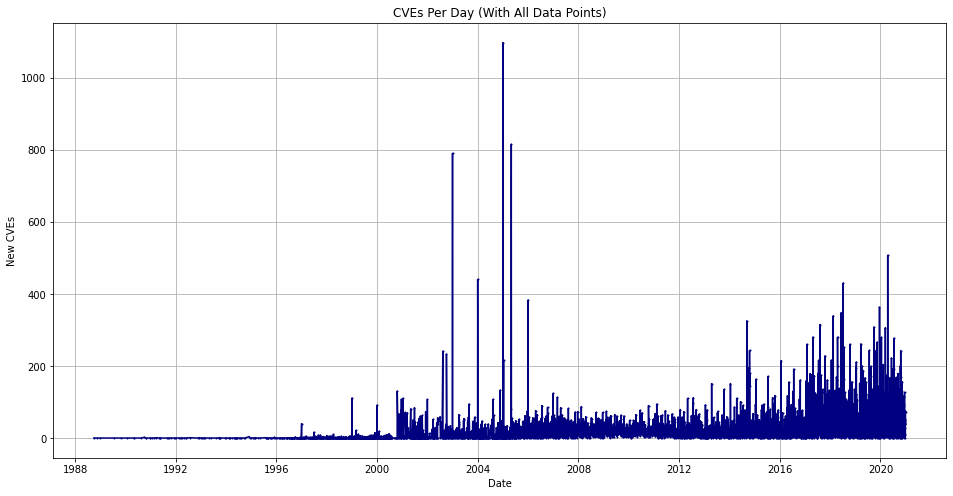

In [10]:
nvd_data = nvd['Published'].value_counts()
cg = nvd_data.plot(colormap='jet', marker='.', figsize=(16, 8), markersize=2, title='CVEs Per Day (With All Data Points)')
plt.grid()
cg.set_ylabel("New CVEs")
cg.set_xlabel("Date")


### Create HeatMap

(<Figure size 900x4039.2 with 34 Axes>,
 array([<AxesSubplot:ylabel='2020'>, <AxesSubplot:ylabel='2019'>,
        <AxesSubplot:ylabel='2018'>, <AxesSubplot:ylabel='2017'>,
        <AxesSubplot:ylabel='2016'>, <AxesSubplot:ylabel='2015'>,
        <AxesSubplot:ylabel='2014'>, <AxesSubplot:ylabel='2013'>,
        <AxesSubplot:ylabel='2012'>, <AxesSubplot:ylabel='2011'>,
        <AxesSubplot:ylabel='2010'>, <AxesSubplot:ylabel='2009'>,
        <AxesSubplot:ylabel='2008'>, <AxesSubplot:ylabel='2007'>,
        <AxesSubplot:ylabel='2006'>, <AxesSubplot:ylabel='2005'>,
        <AxesSubplot:ylabel='2004'>, <AxesSubplot:ylabel='2003'>,
        <AxesSubplot:ylabel='2002'>, <AxesSubplot:ylabel='2001'>,
        <AxesSubplot:ylabel='2000'>, <AxesSubplot:ylabel='1999'>,
        <AxesSubplot:ylabel='1998'>, <AxesSubplot:ylabel='1997'>,
        <AxesSubplot:ylabel='1996'>, <AxesSubplot:ylabel='1995'>,
        <AxesSubplot:ylabel='1994'>, <AxesSubplot:ylabel='1993'>,
        <AxesSubplot:ylabel='1992'>,

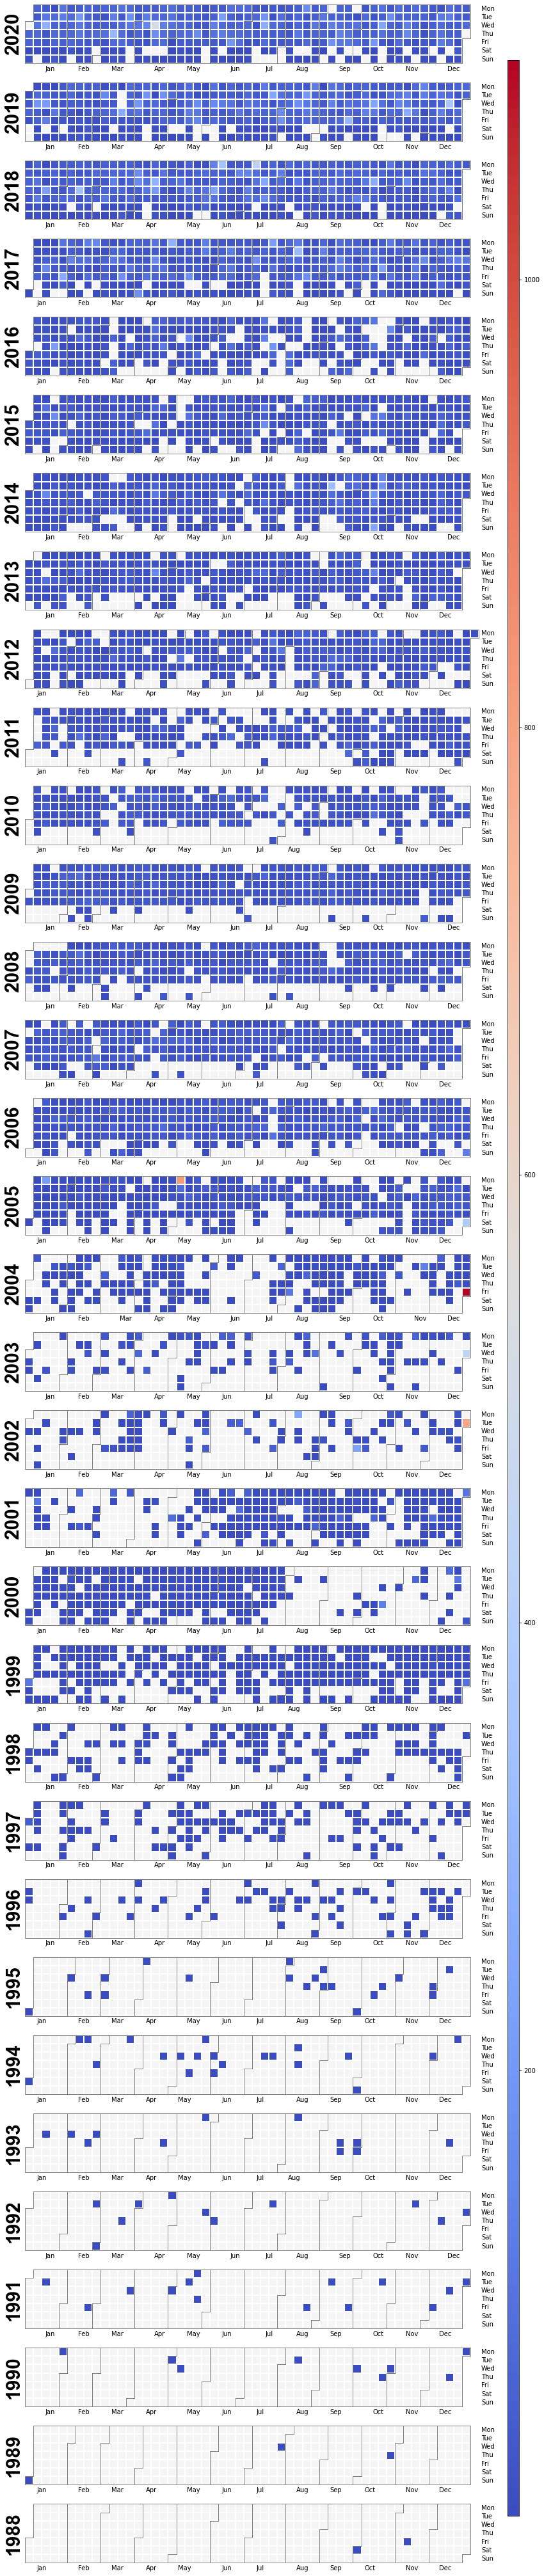

In [11]:
dfs = nvd['Published'].apply(lambda x: pd.to_datetime(x, errors='coerce', format='%Y/%m/%d'))
df = dfs.value_counts()
df = df.to_frame()
df.index = df.index.strftime('%m/%d/%Y')
df.index = pd.to_datetime(df.index, format='%m/%d/%Y')
df2 = df.T.squeeze()
calplot.calplot(df.T.squeeze(), yearcolor='black', cmap='coolwarm', dropzero=True, yearascending=False)